In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

spam_df = pd.read_csv('/content/drive/MyDrive/final_project/SMSSpamCollection', sep='\t', header=None, names=['label', 'message'])
spam_df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [41]:
spam_df.info()
print("\nShape of SMS spam: ",spam_df.shape)
spam_df['label'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB

Shape of SMS spam:  (5572, 2)


,count
label,
ham,4825
spam,747


Find and Drop Null, Duplicates

In [42]:
spam_df.isnull().sum()  # displaying null values

,0
label,0
message,0


In [43]:
spam_df.duplicated().sum() # displaying duplicates

np.int64(403)

In [44]:
spam_df = spam_df.drop_duplicates(keep='first')  # dropping duplicates
spam_df.duplicated().sum()

np.int64(0)

In [45]:
print(spam_df['label'].value_counts())

label
ham     4516
spam     653
Name: count, dtype: int64


Visual of target

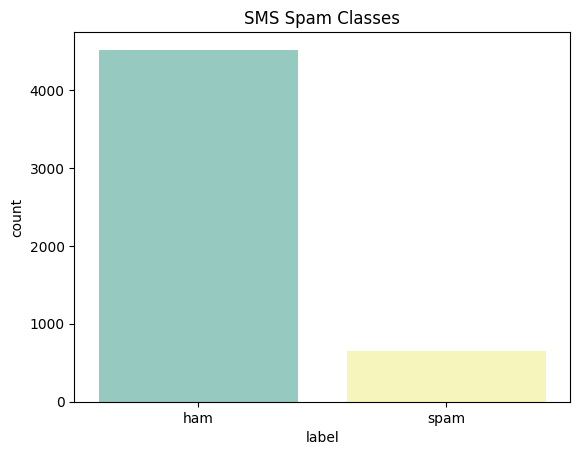

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=spam_df, palette='Set3')
plt.title('SMS Spam Classes')
plt.show()

In [47]:
from sklearn.preprocessing import LabelEncoder

spam_labelEncode = LabelEncoder()
spam_df['label']= spam_labelEncode.fit_transform(spam_df['label'])
spam_df.tail()

,label,message
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...
5571,0,Rofl. Its true to its name


Noise Removal

In [48]:
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
punctuations = string.punctuation

def clean_text(text):
    text = text.lower()     # Changing Lowercase
    text = ''.join([char for char in text if char not in punctuations])  # Remove punctuation
    words = text.split()  # Remove stopwords
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

spam_df['clean_message'] = spam_df['message'].apply(clean_text)
spam_df[['label', 'clean_message']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,label,clean_message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor u c already say
4,0,nah dont think goes usf lives around though


In [49]:
spam_df = spam_df[['label', 'clean_message']]
spam_df

,label,clean_message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor u c already say
4,0,nah dont think goes usf lives around though
...,...,...
5567,1,2nd time tried 2 contact u u £750 pound prize ...
5568,0,ü b going esplanade fr home
5569,0,pity mood soany suggestions
5570,0,guy bitching acted like id interested buying s...


In [50]:
spam_df.info()
print("\nShape of SMS spam: ",spam_df.shape)
spam_df['label'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   label          5169 non-null   int64 
 1   clean_message  5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB

Shape of SMS spam:  (5169, 2)


,count
label,
0,4516
1,653


### Count Vectorizer

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

spam_X = spam_df.drop('label',axis=1)
spam_y = spam_df['label']

spam_cvector = CountVectorizer(analyzer='word', max_features=1000)
spam_X = spam_cvector.fit_transform(spam_df['clean_message'].values.astype('U')).toarray()
print("Count Vectorized shape of SMS spam: ",spam_X.shape)

Count Vectorized shape of SMS spam:  (5169, 1000)


In [52]:
np.set_printoptions(threshold=np.inf)
print(spam_X[:1]) # printing only one row

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

Balancing the data using SMOTE

In [53]:
from imblearn.over_sampling import SMOTE

## Creating SMOTE object
spam_smote = SMOTE(random_state=12)

## Apply SMOTE to the features and labels
spamX_resampled, spamY_resampled = spam_smote.fit_resample(spam_X, spam_y)

## Class distribution after resampling
from collections import Counter
print("Class distribution after SMOTE:", Counter(spamY_resampled))


Class distribution after SMOTE: Counter({0: 4516, 1: 4516})


Splitting SMS Data for Count Vectorization

In [54]:
## Splitting of train, test and validation (60:20:20)
X_train, X_test, y_train, y_test = train_test_split(spamX_resampled, spamY_resampled, random_state=12, test_size=0.4)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, random_state=12, test_size=0.5)

print("Training SMS Samples: ", X_train.shape)
print("Validation SMS Samples: ", X_val.shape)
print("Testing SMS Samples: ", X_test.shape)

Training SMS Samples:  (5419, 1000)
Validation SMS Samples:  (1806, 1000)
Testing SMS Samples:  (1807, 1000)


### Logistic Regression

Selected Parameters for Logistic Regression:
 {'C': 0.2, 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       866
           1       0.94      0.98      0.96       940

    accuracy                           0.95      1806
   macro avg       0.96      0.95      0.95      1806
weighted avg       0.96      0.95      0.95      1806



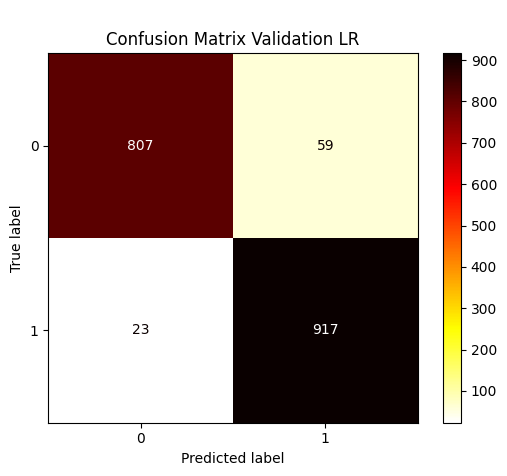

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       927
           1       0.92      0.98      0.95       880

    accuracy                           0.95      1807
   macro avg       0.95      0.95      0.95      1807
weighted avg       0.95      0.95      0.95      1807



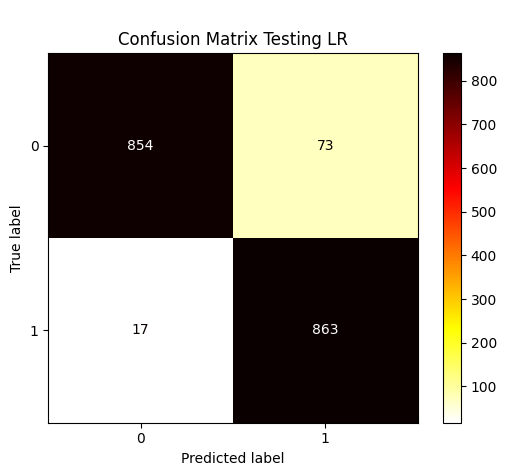

In [55]:
from sklearn.linear_model import LogisticRegression

parameters_tuning = {'penalty': ['l1', 'l2', 'elasticnet'],
                    'C': [0.1, 0.001, 0.2],
                    'solver': ['lbfgs','liblinear','sag']}

sms_model = LogisticRegression()
sms_model = GridSearchCV(sms_model, parameters_tuning, cv=2)
sms_model.fit(X_train[:700], y_train[:700])
print("Selected Parameters for Logistic Regression:\n", sms_model.best_params_)

## evaluation of training
sms_model = sms_model.best_estimator_
sms_model.fit(X_train, y_train)

## evaluation of validation
y_pred = sms_model.predict(X_val)
print(classification_report(y_val, y_pred))

cmatrix = confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=[0, 1]).plot(cmap='hot_r')
plt.title('\nConfusion Matrix Validation LR')
plt.show()

## evaluation of testing
y_pred = sms_model.predict(X_test)
print(classification_report(y_test, y_pred))

cmatrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=[0, 1]).plot(cmap='hot_r')
plt.title('\nConfusion Matrix Testing LR')
plt.show()

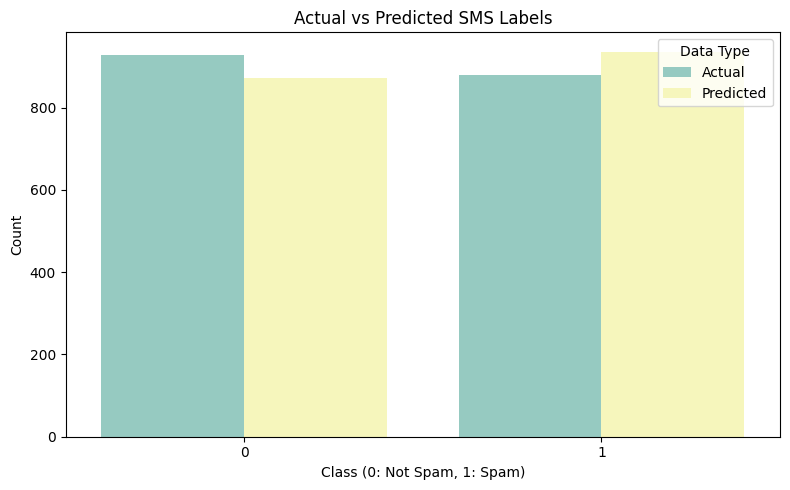

In [56]:
## Converting DataFrame for plotting
spam_results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Melt the DataFrame for seaborn countplot
melted_results = pd.melt(spam_results_df, value_vars=['Actual', 'Predicted'], var_name='Type', value_name='Label')

## Plot the countplot
plt.figure(figsize=(8, 5))
sns.countplot(data=melted_results, x='Label', hue='Type', palette='Set3')
plt.title("Actual vs Predicted SMS Labels")
plt.xlabel('Class (0: Not Spam, 1: Spam)')
plt.ylabel("Count")
plt.legend(title="Data Type")
plt.tight_layout()
plt.show()

### Naive Bayes

Selected Parameters for Naive Bayes:
 {'priors': None, 'var_smoothing': 1e-09}
              precision    recall  f1-score   support

           0       0.98      0.82      0.89       866
           1       0.86      0.99      0.92       940

    accuracy                           0.91      1806
   macro avg       0.92      0.90      0.91      1806
weighted avg       0.92      0.91      0.91      1806



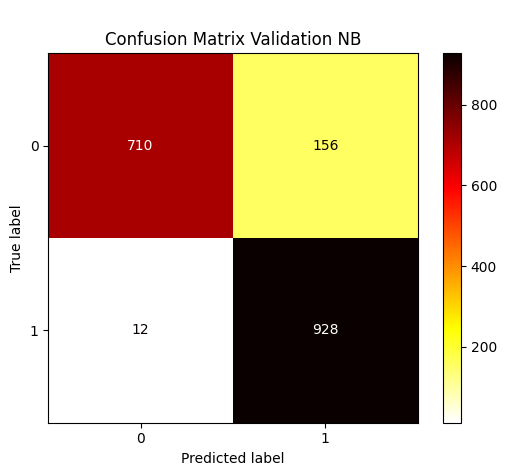

              precision    recall  f1-score   support

           0       0.99      0.78      0.87       927
           1       0.81      0.99      0.89       880

    accuracy                           0.88      1807
   macro avg       0.90      0.88      0.88      1807
weighted avg       0.90      0.88      0.88      1807



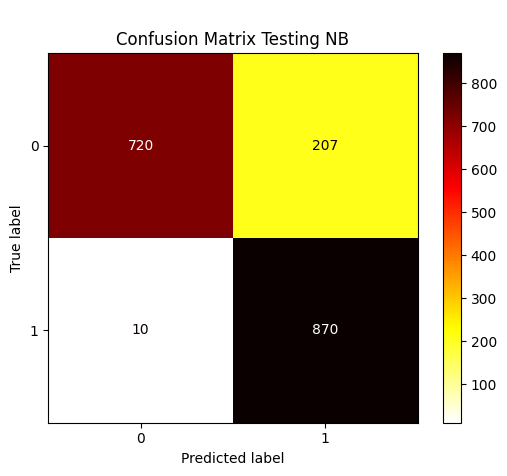

In [57]:
from sklearn.naive_bayes import GaussianNB

parameters_tuning = {'priors': [None, 0.1, 0.001, 0.05, 1.0],
                    'var_smoothing': [1e-09, 1e-06, 1e-05]}

sms_model = GaussianNB()
sms_model = GridSearchCV(sms_model, parameters_tuning, cv=2)
sms_model.fit(X_train[:700], y_train[:700])
print("Selected Parameters for Naive Bayes:\n", sms_model.best_params_)

## evaluation of training
sms_model = sms_model.best_estimator_
sms_model.fit(X_train, y_train)

## evaluation of validation
y_pred = sms_model.predict(X_val)
print(classification_report(y_val, y_pred))

cmatrix = confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=[0, 1]).plot(cmap='hot_r')
plt.title('\nConfusion Matrix Validation NB')
plt.show()

## evaluation of testing
y_pred = sms_model.predict(X_test)
print(classification_report(y_test, y_pred))

cmatrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=[0, 1]).plot(cmap='hot_r')
plt.title('\nConfusion Matrix Testing NB')
plt.show()

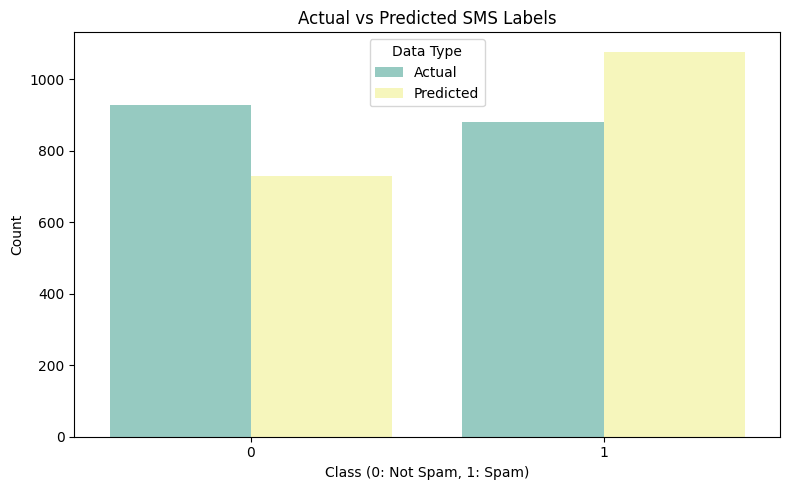

In [58]:
## Converting DataFrame for plotting
spam_results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Melt the DataFrame for seaborn countplot
melted_results = pd.melt(spam_results_df, value_vars=['Actual', 'Predicted'], var_name='Type', value_name='Label')

## Plot the countplot
plt.figure(figsize=(8, 5))
sns.countplot(data=melted_results, x='Label', hue='Type', palette='Set3')
plt.title("Actual vs Predicted SMS Labels")
plt.xlabel('Class (0: Not Spam, 1: Spam)')
plt.ylabel("Count")
plt.legend(title="Data Type")
plt.tight_layout()
plt.show()

### Random Forest

Selected Parameters for Random Forest:
 {'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 15, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.72      0.96      0.83       866
           1       0.95      0.66      0.78       940

    accuracy                           0.81      1806
   macro avg       0.84      0.81      0.80      1806
weighted avg       0.84      0.81      0.80      1806



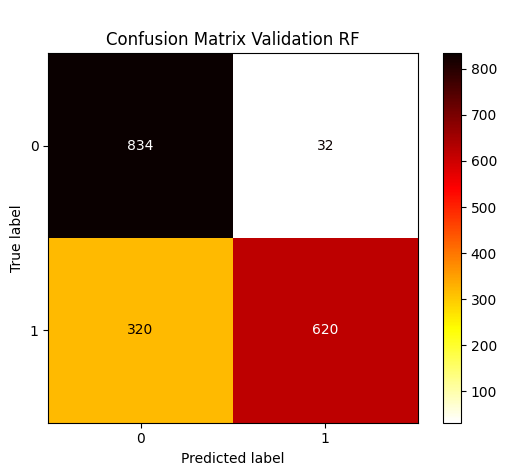

              precision    recall  f1-score   support

           0       0.74      0.96      0.84       927
           1       0.94      0.65      0.77       880

    accuracy                           0.81      1807
   macro avg       0.84      0.81      0.80      1807
weighted avg       0.84      0.81      0.81      1807



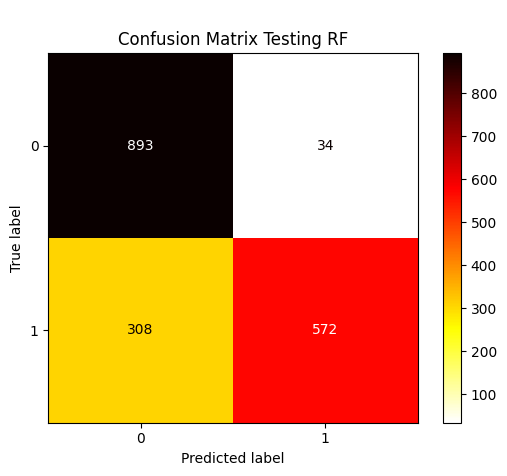

In [59]:
from sklearn.ensemble import RandomForestClassifier

parameters_tuning = {'n_estimators': [50, 10, 100, 200],
                    'criterion': ['gini', 'emtropy', 'log_loss'],
                    'max_depth': [3, 5, 10, 15],
                    'class_weight': ['balanced','balanced_subsample']}

sms_model = RandomForestClassifier()
sms_model = GridSearchCV(sms_model, parameters_tuning, cv=2)
sms_model.fit(X_train[:700], y_train[:700])
print("Selected Parameters for Random Forest:\n", sms_model.best_params_)

## evaluation of training
sms_model = sms_model.best_estimator_
sms_model.fit(X_train, y_train)

## evaluation of validation
y_pred = sms_model.predict(X_val)
print(classification_report(y_val, y_pred))

cmatrix = confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=[0, 1]).plot(cmap='hot_r')
plt.title('\nConfusion Matrix Validation RF')
plt.show()

## evaluation of testing
y_pred = sms_model.predict(X_test)
print(classification_report(y_test, y_pred))

cmatrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=[0, 1]).plot(cmap='hot_r')
plt.title('\nConfusion Matrix Testing RF')
plt.show()

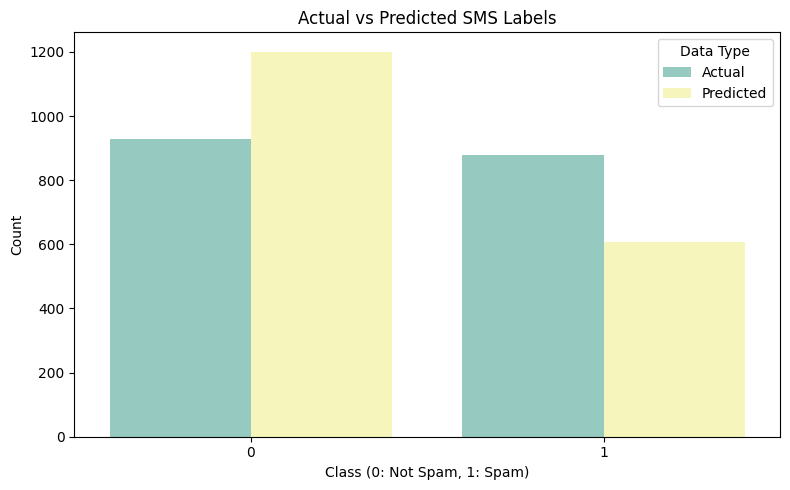

In [60]:
## Converting DataFrame for plotting
spam_results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Melt the DataFrame for seaborn countplot
melted_results = pd.melt(spam_results_df, value_vars=['Actual', 'Predicted'], var_name='Type', value_name='Label')

## Plot the countplot
plt.figure(figsize=(8, 5))
sns.countplot(data=melted_results, x='Label', hue='Type', palette='Set3')
plt.title("Actual vs Predicted SMS Labels")
plt.xlabel('Class (0: Not Spam, 1: Spam)')
plt.ylabel("Count")
plt.legend(title="Data Type")
plt.tight_layout()
plt.show()

### Support Vector Machines

Selected Parameters for Support Vector Machines:
 {'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       866
           1       0.90      0.98      0.94       940

    accuracy                           0.93      1806
   macro avg       0.94      0.93      0.93      1806
weighted avg       0.93      0.93      0.93      1806



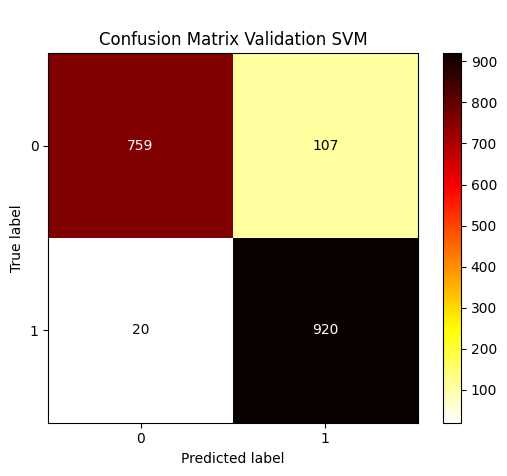

              precision    recall  f1-score   support

           0       0.98      0.87      0.92       927
           1       0.88      0.98      0.92       880

    accuracy                           0.92      1807
   macro avg       0.93      0.92      0.92      1807
weighted avg       0.93      0.92      0.92      1807



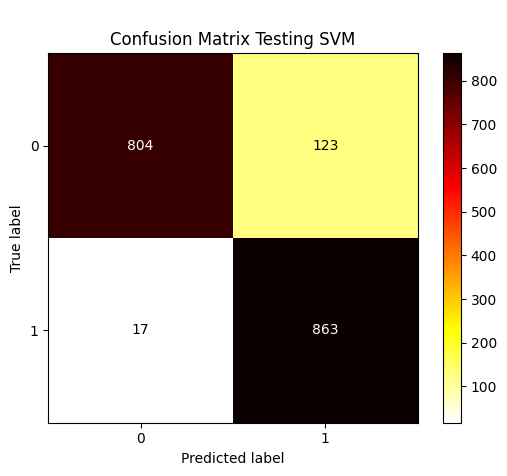

In [61]:
from sklearn.svm import SVC

parameters_tuning = {'gamma': ['scale', 'auto'],
                    'degree': [2, 5, 10, 15],
                    'kernel': ['rbf','poly','linear']}

sms_model = SVC()
sms_model = GridSearchCV(sms_model, parameters_tuning, cv=2)
sms_model.fit(X_train[:700], y_train[:700])
print("Selected Parameters for Support Vector Machines:\n", sms_model.best_params_)

## evaluation of training
sms_model = sms_model.best_estimator_
sms_model.fit(X_train, y_train)

## evaluation of validation
y_pred = sms_model.predict(X_val)
print(classification_report(y_val, y_pred))

cmatrix = confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=[0, 1]).plot(cmap='hot_r')
plt.title('\nConfusion Matrix Validation SVM')
plt.show()

## evaluation of testing
y_pred = sms_model.predict(X_test)
print(classification_report(y_test, y_pred))

cmatrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=[0, 1]).plot(cmap='hot_r')
plt.title('\nConfusion Matrix Testing SVM')
plt.show()

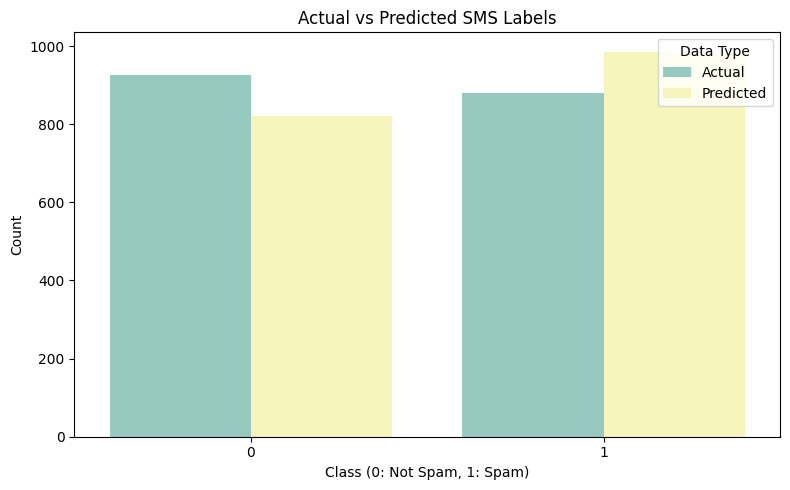

In [62]:
## Converting DataFrame for plotting
spam_results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Melt the DataFrame for seaborn countplot
melted_results = pd.melt(spam_results_df, value_vars=['Actual', 'Predicted'], var_name='Type', value_name='Label')

## Plot the countplot
plt.figure(figsize=(8, 5))
sns.countplot(data=melted_results, x='Label', hue='Type', palette='Set3')
plt.title("Actual vs Predicted SMS Labels")
plt.xlabel('Class (0: Not Spam, 1: Spam)')
plt.ylabel("Count")
plt.legend(title="Data Type")
plt.tight_layout()
plt.show()

### TFIDF Vectorizer

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

spam_X = spam_df.drop('label',axis=1)
spam_y = spam_df['label']

spam_tfvector = TfidfVectorizer(analyzer='word', max_features=1000)
spam_X = spam_tfvector.fit_transform(spam_df['clean_message'].values.astype('U')).toarray()
print("Tfidf Vectorized shape of SMS spam: ",spam_X.shape)

Tfidf Vectorized shape of SMS spam:  (5169, 1000)


In [64]:
import numpy as np
np.set_printoptions(threshold=np.inf)
print(spamX_resampled[:1]) # printing only one row

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

Balancing the data using SMOTE

In [65]:
## Creating SMOTE object
spam_smote = SMOTE(random_state=12)

## Apply SMOTE to the features and labels
spamX_resampled, spamY_resampled = spam_smote.fit_resample(spam_X, spam_y)

## Class distribution after resampling
from collections import Counter
print("Class distribution after SMOTE:", Counter(spamY_resampled))

Class distribution after SMOTE: Counter({0: 4516, 1: 4516})


Splitting SMS Data for TFIDF Vectorization

In [66]:
## Splitting of train, test and validation (60:20:20)
X_train, X_test, y_train, y_test = train_test_split(spamX_resampled, spamY_resampled, random_state=12, test_size=0.4)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, random_state=12, test_size=0.5)

print("Training SMS Samples: ", X_train.shape)
print("Validation SMS Samples: ", X_val.shape)
print("Testing SMS Samples: ", X_test.shape)

Training SMS Samples:  (5419, 1000)
Validation SMS Samples:  (1806, 1000)
Testing SMS Samples:  (1807, 1000)


### Logistic Regression

Selected Parameters for Logistic Regression:
 {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       866
           1       0.97      0.86      0.91       940

    accuracy                           0.92      1806
   macro avg       0.92      0.92      0.92      1806
weighted avg       0.92      0.92      0.92      1806



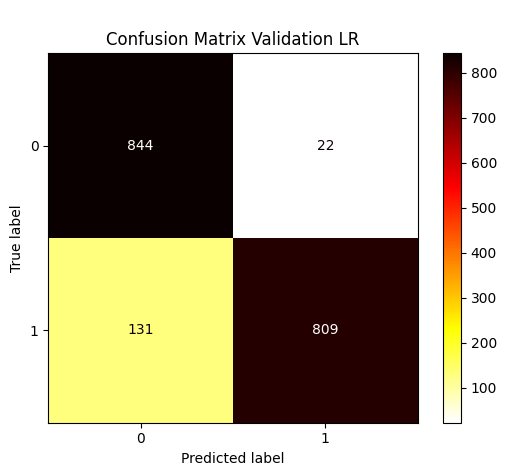

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       927
           1       0.96      0.86      0.91       880

    accuracy                           0.91      1807
   macro avg       0.92      0.91      0.91      1807
weighted avg       0.92      0.91      0.91      1807



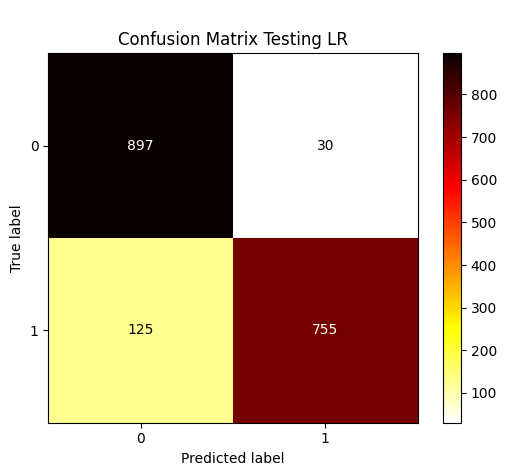

In [67]:
parameters_tuning = {'penalty': ['l1', 'l2', 'elasticnet'],
                    'C': [0.1, 0.001, 0.2],
                    'solver': ['lbfgs','liblinear','sag']}

sms_model = LogisticRegression()
sms_model = GridSearchCV(sms_model, parameters_tuning, cv=2)
sms_model.fit(X_train[:700], y_train[:700])
print("Selected Parameters for Logistic Regression:\n", sms_model.best_params_)

## evaluation of training
sms_model = sms_model.best_estimator_
sms_model.fit(X_train, y_train)

## evaluation of validation
y_pred = sms_model.predict(X_val)
print(classification_report(y_val, y_pred))

cmatrix = confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=[0, 1]).plot(cmap='hot_r')
plt.title('\nConfusion Matrix Validation LR')
plt.show()

## evaluation of testing
y_pred = sms_model.predict(X_test)
print(classification_report(y_test, y_pred))

cmatrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=[0, 1]).plot(cmap='hot_r')
plt.title('\nConfusion Matrix Testing LR')
plt.show()

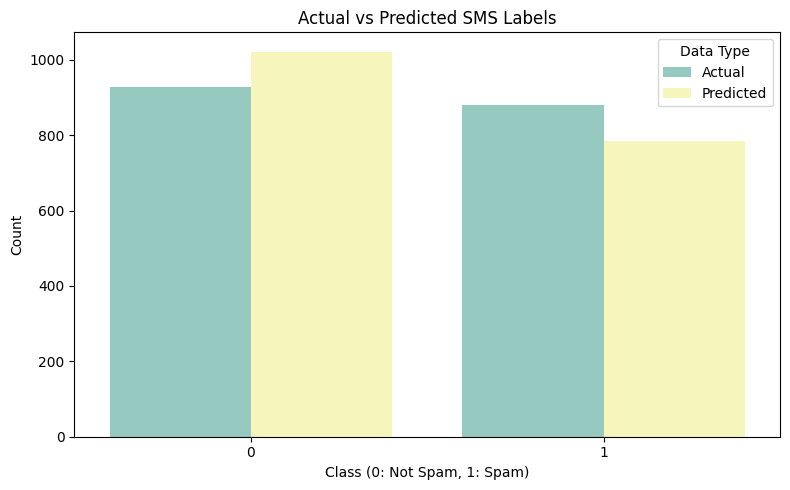

In [68]:
## Converting DataFrame for plotting
spam_results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Melt the DataFrame for seaborn countplot
melted_results = pd.melt(spam_results_df, value_vars=['Actual', 'Predicted'], var_name='Type', value_name='Label')

## Plot the countplot
plt.figure(figsize=(8, 5))
sns.countplot(data=melted_results, x='Label', hue='Type', palette='Set3')
plt.title("Actual vs Predicted SMS Labels")
plt.xlabel('Class (0: Not Spam, 1: Spam)')
plt.ylabel("Count")
plt.legend(title="Data Type")
plt.tight_layout()
plt.show()

### Naive Bayes

Selected Parameters for Naive Bayes:
 {'priors': None, 'var_smoothing': 1e-05}
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       866
           1       0.90      0.99      0.94       940

    accuracy                           0.94      1806
   macro avg       0.95      0.94      0.94      1806
weighted avg       0.94      0.94      0.94      1806



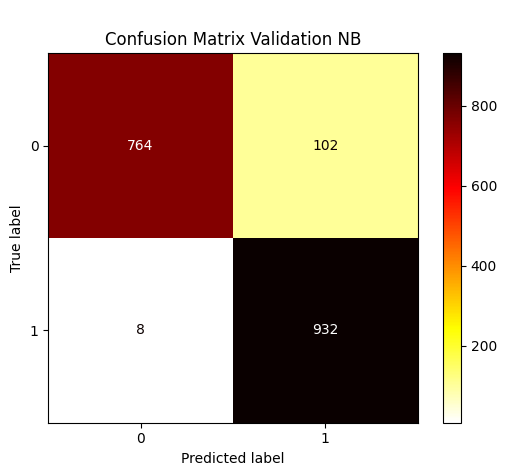

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       927
           1       0.87      1.00      0.93       880

    accuracy                           0.92      1807
   macro avg       0.93      0.93      0.92      1807
weighted avg       0.93      0.92      0.92      1807



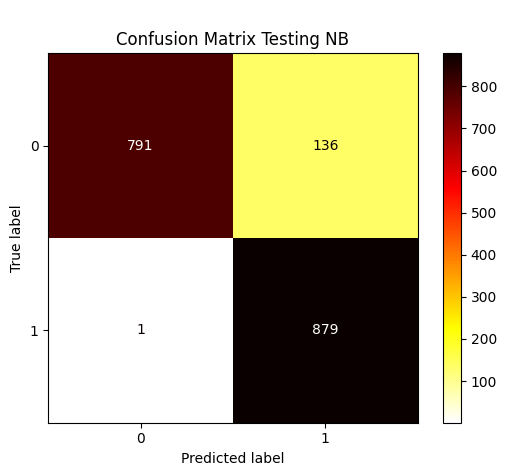

In [69]:
parameters_tuning = {'priors': [None, 0.1, 0.001, 0.05, 1.0],
                    'var_smoothing': [1e-09, 1e-06, 1e-05]}

sms_model = GaussianNB()
sms_model = GridSearchCV(sms_model, parameters_tuning, cv=2)
sms_model.fit(X_train[:700], y_train[:700])
print("Selected Parameters for Naive Bayes:\n", sms_model.best_params_)

## evaluation of training
sms_model = sms_model.best_estimator_
sms_model.fit(X_train, y_train)

## evaluation of validation
y_pred = sms_model.predict(X_val)
print(classification_report(y_val, y_pred))

cmatrix = confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=[0, 1]).plot(cmap='hot_r')
plt.title('\nConfusion Matrix Validation NB')
plt.show()

## evaluation of testing
y_pred = sms_model.predict(X_test)
print(classification_report(y_test, y_pred))

cmatrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=[0, 1]).plot(cmap='hot_r')
plt.title('\nConfusion Matrix Testing NB')
plt.show()

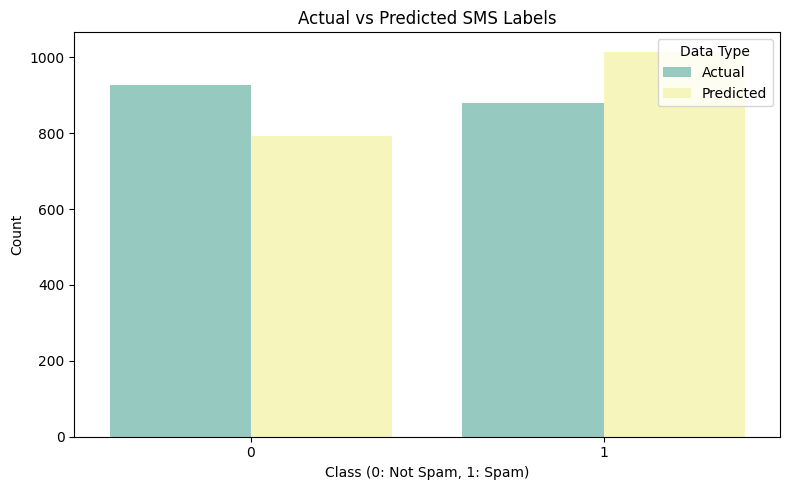

In [70]:
## Converting DataFrame for plotting
spam_results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Melt the DataFrame for seaborn countplot
melted_results = pd.melt(spam_results_df, value_vars=['Actual', 'Predicted'], var_name='Type', value_name='Label')

## Plot the countplot
plt.figure(figsize=(8, 5))
sns.countplot(data=melted_results, x='Label', hue='Type', palette='Set3')
plt.title("Actual vs Predicted SMS Labels")
plt.xlabel('Class (0: Not Spam, 1: Spam)')
plt.ylabel("Count")
plt.legend(title="Data Type")
plt.tight_layout()
plt.show()

### Random Forest

Selected Parameters for Random Forest:
 {'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 10, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       866
           1       0.99      0.88      0.93       940

    accuracy                           0.93      1806
   macro avg       0.93      0.93      0.93      1806
weighted avg       0.94      0.93      0.93      1806



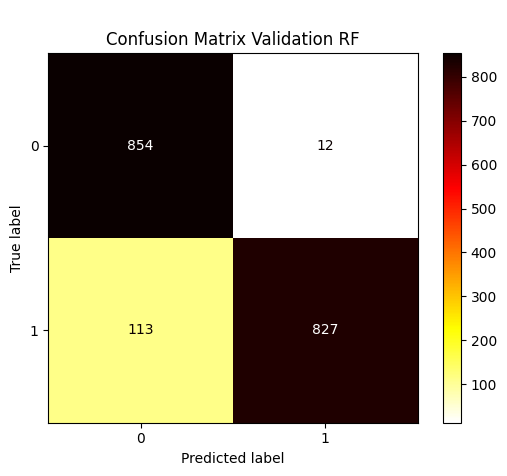

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       927
           1       0.98      0.88      0.92       880

    accuracy                           0.93      1807
   macro avg       0.93      0.93      0.93      1807
weighted avg       0.93      0.93      0.93      1807



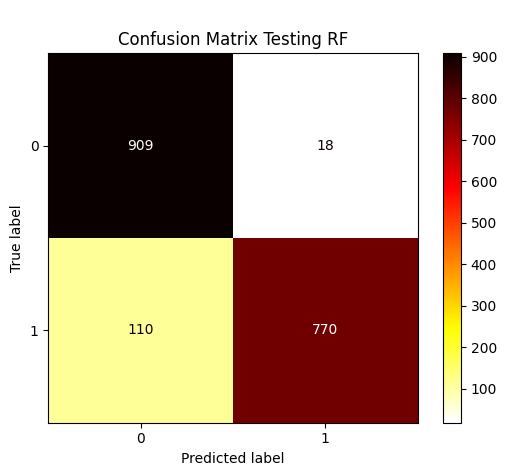

In [71]:
parameters_tuning = {'n_estimators': [50, 10, 100, 200],
                    'criterion': ['gini', 'emtropy', 'log_loss'],
                    'max_depth': [3, 5, 10, 15],
                    'class_weight': ['balanced','balanced_subsample']}

sms_model = RandomForestClassifier()
sms_model = GridSearchCV(sms_model, parameters_tuning, cv=2)
sms_model.fit(X_train[:700], y_train[:700])
print("Selected Parameters for Random Forest:\n", sms_model.best_params_)

## evaluation of training
sms_model = sms_model.best_estimator_
sms_model.fit(X_train, y_train)

## evaluation of validation
y_pred = sms_model.predict(X_val)
print(classification_report(y_val, y_pred))

cmatrix = confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=[0, 1]).plot(cmap='hot_r')
plt.title('\nConfusion Matrix Validation RF')
plt.show()

## evaluation of testing
y_pred = sms_model.predict(X_test)
print(classification_report(y_test, y_pred))

cmatrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=[0, 1]).plot(cmap='hot_r')
plt.title('\nConfusion Matrix Testing RF')
plt.show()

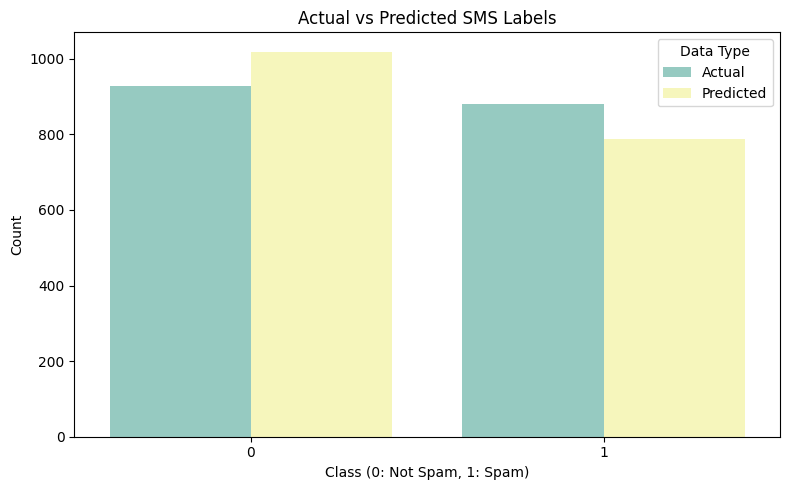

In [72]:
## Converting DataFrame for plotting
spam_results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Melt the DataFrame for seaborn countplot
melted_results = pd.melt(spam_results_df, value_vars=['Actual', 'Predicted'], var_name='Type', value_name='Label')

## Plot the countplot
plt.figure(figsize=(8, 5))
sns.countplot(data=melted_results, x='Label', hue='Type', palette='Set3')
plt.title("Actual vs Predicted SMS Labels")
plt.xlabel('Class (0: Not Spam, 1: Spam)')
plt.ylabel("Count")
plt.legend(title="Data Type")
plt.tight_layout()
plt.show()

### Support Vector Machines

Selected Parameters for Support Vector Machines:
 {'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       866
           1       0.97      0.99      0.98       940

    accuracy                           0.98      1806
   macro avg       0.98      0.98      0.98      1806
weighted avg       0.98      0.98      0.98      1806



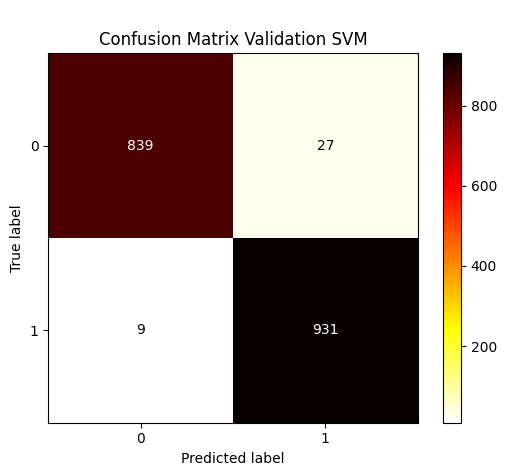

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       927
           1       0.96      1.00      0.98       880

    accuracy                           0.98      1807
   macro avg       0.98      0.98      0.98      1807
weighted avg       0.98      0.98      0.98      1807



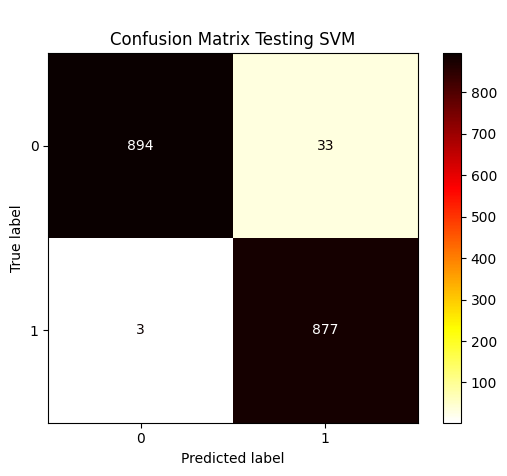

In [73]:
parameters_tuning = {'gamma': ['scale', 'auto'],
                    'degree': [2, 5, 10, 15],
                    'kernel': ['rbf','poly','linear']}

sms_model = SVC()
sms_model = GridSearchCV(sms_model, parameters_tuning, cv=2)
sms_model.fit(X_train[:700], y_train[:700])
print("Selected Parameters for Support Vector Machines:\n", sms_model.best_params_)

## evaluation of training
sms_model = sms_model.best_estimator_
sms_model.fit(X_train, y_train)

## evaluation of validation
y_pred = sms_model.predict(X_val)
print(classification_report(y_val, y_pred))

cmatrix = confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=[0, 1]).plot(cmap='hot_r')
plt.title('\nConfusion Matrix Validation SVM')
plt.show()

## evaluation of testing
y_pred = sms_model.predict(X_test)
print(classification_report(y_test, y_pred))

cmatrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=[0, 1]).plot(cmap='hot_r')
plt.title('\nConfusion Matrix Testing SVM')
plt.show()

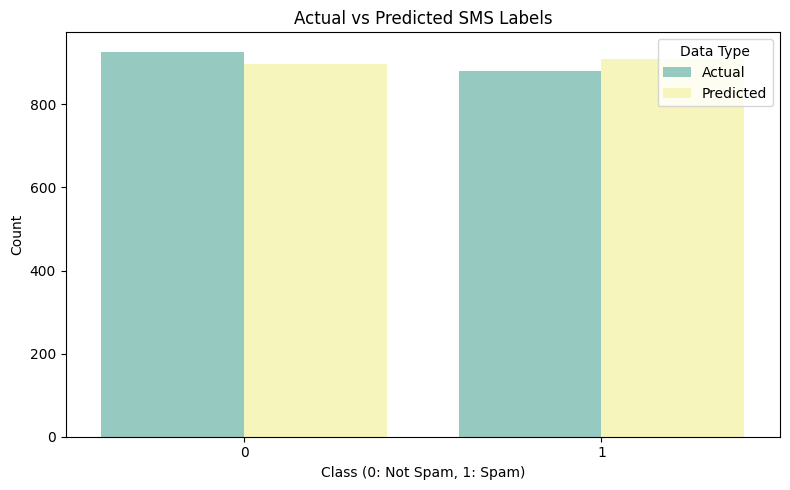

In [74]:
## Converting DataFrame for plotting
spam_results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Melt the DataFrame for seaborn countplot
melted_results = pd.melt(spam_results_df, value_vars=['Actual', 'Predicted'], var_name='Type', value_name='Label')

## Plot the countplot
plt.figure(figsize=(8, 5))
sns.countplot(data=melted_results, x='Label', hue='Type', palette='Set3')
plt.title("Actual vs Predicted SMS Labels")
plt.xlabel('Class (0: Not Spam, 1: Spam)')
plt.ylabel("Count")
plt.legend(title="Data Type")
plt.tight_layout()
plt.show()

### BERT Vectorizer

In [75]:
spam_X = spam_df.drop('label',axis=1)
spam_y = spam_df['label']

import torch
from transformers import BertTokenizer, BertModel

# Loading pre-trained BERT tokenizer and model (using base uncased BERT)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

# get BERT embeddings for each message
def get_bert_embeddings(text_list):
    embeddings = []
    for text in text_list:
        # Encode text and get tensor
        inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)

        with torch.no_grad():  # No gradient calculation
            outputs = bert_model(**inputs)

        # Get [CLS] token embedding (first token) as sentence embedding
        cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze().numpy()
        embeddings.append(cls_embedding)

    return embeddings

# Apply the function to clean_message column
clean_texts = spam_df['clean_message'].values.astype('U')
bert_embeddings = get_bert_embeddings(clean_texts)

# Convert to numpy array
import numpy as np
spam_X_bert = np.array(bert_embeddings)

print("BERT Vectorized shape of SMS spam: ", spam_X_bert.shape)

BERT Vectorized shape of SMS spam:  (5169, 768)


In [76]:
np.set_printoptions(threshold=np.inf)
print(spam_X_bert[:1]) # printing only one row

[[-3.11951727e-01 -3.39974791e-01  1.36590555e-01 -9.34136212e-02
  -6.08704269e-01 -2.81182140e-01  7.43151784e-01  2.92309493e-01
   6.15224019e-02  1.11869931e-01  1.13586903e-01  1.70971535e-03
   6.14011437e-02  3.42506200e-01  3.26688737e-01  2.25349233e-01
  -1.10554487e-01  9.27157700e-02  4.44585413e-01 -2.80926824e-01
  -1.00065291e-01 -4.46331441e-01 -1.35216773e-01 -4.45976369e-02
   6.44940436e-02 -1.19636603e-01  5.64348586e-02  1.80927515e-01
   3.46765459e-01  1.19832903e-01  1.48340553e-01  3.03430587e-01
  -3.78950447e-01 -1.97564691e-01  2.39154682e-01  3.76302451e-01
   4.87551719e-01 -1.12717845e-01  6.15758933e-02  2.23601633e-03
  -5.84593304e-02  2.05982774e-01  1.68133125e-01 -2.66646221e-03
   1.28136560e-01 -3.46511722e-01 -3.05058241e+00  1.93699643e-01
  -2.56304592e-01 -6.75893426e-01  5.06511390e-01 -3.64547640e-01
   1.70367435e-01  1.53381705e-01 -2.77995557e-01  6.02679849e-01
  -2.58518189e-01  5.02414286e-01  5.76695278e-02  2.09334418e-01
   2.09319

In [77]:
## Creating SMOTE object
spam_smote = SMOTE(random_state=12)

## Apply SMOTE to the features and labels
spamX_resampled, spamY_resampled = spam_smote.fit_resample(spam_X_bert, spam_y)

## Class distribution after resampling
from collections import Counter
print("Class distribution after SMOTE:", Counter(spamY_resampled))

Class distribution after SMOTE: Counter({0: 4516, 1: 4516})


Splitting SMS Data for BERT Vectorizer

In [78]:
## Splitting of train, test and validation (60:20:20)
X_train, X_test, y_train, y_test = train_test_split(spamX_resampled, spamY_resampled, random_state=12, test_size=0.4)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, random_state=12, test_size=0.5)

print("Training SMS Samples: ", X_train.shape)
print("Validation SMS Samples: ", X_val.shape)
print("Testing SMS Samples: ", X_test.shape)

Training SMS Samples:  (5419, 768)
Validation SMS Samples:  (1806, 768)
Testing SMS Samples:  (1807, 768)


### Logistic Regression

Selected Parameters for Logistic Regression:
 {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       866
           1       0.99      0.98      0.98       940

    accuracy                           0.98      1806
   macro avg       0.98      0.98      0.98      1806
weighted avg       0.98      0.98      0.98      1806



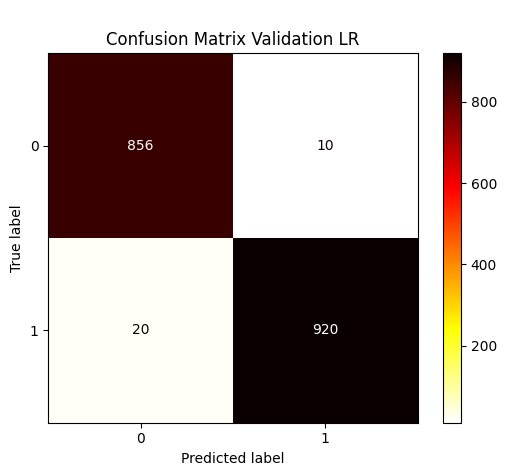

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       927
           1       0.99      0.98      0.99       880

    accuracy                           0.99      1807
   macro avg       0.99      0.99      0.99      1807
weighted avg       0.99      0.99      0.99      1807



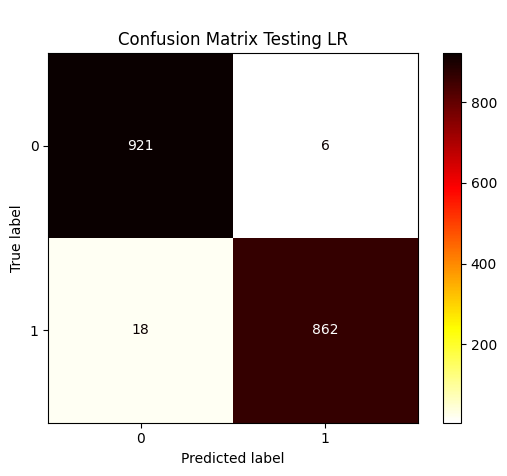

In [79]:
parameters_tuning = {'penalty': ['l1', 'l2', 'elasticnet'],
                    'C': [0.1, 0.001, 0.2],
                    'solver': ['lbfgs','liblinear','sag']}

sms_model = LogisticRegression()
sms_model = GridSearchCV(sms_model, parameters_tuning, cv=2)
sms_model.fit(X_train[:700], y_train[:700])
print("Selected Parameters for Logistic Regression:\n", sms_model.best_params_)

## evaluation of training
sms_model = sms_model.best_estimator_
sms_model.fit(X_train, y_train)

## evaluation of validation
y_pred = sms_model.predict(X_val)
print(classification_report(y_val, y_pred))

cmatrix = confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=[0, 1]).plot(cmap='hot_r')
plt.title('\nConfusion Matrix Validation LR')
plt.show()

## evaluation of testing
y_pred = sms_model.predict(X_test)
print(classification_report(y_test, y_pred))

cmatrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=[0, 1]).plot(cmap='hot_r')
plt.title('\nConfusion Matrix Testing LR')
plt.show()

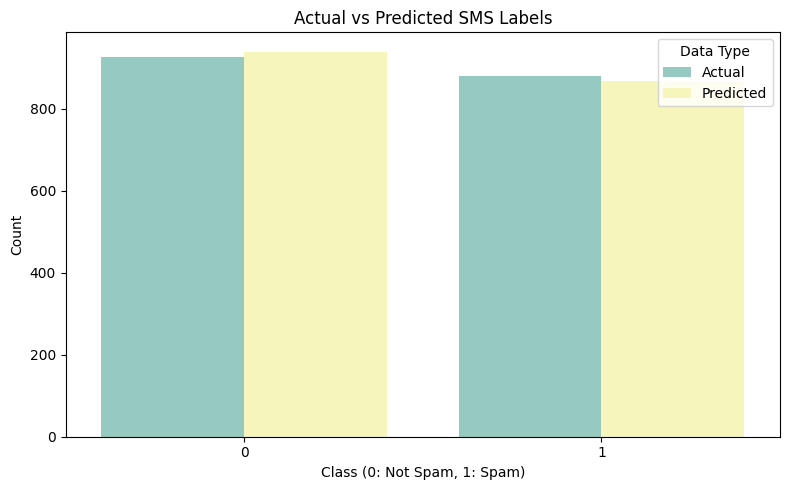

In [80]:
## Converting DataFrame for plotting
spam_results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Melt the DataFrame for seaborn countplot
melted_results = pd.melt(spam_results_df, value_vars=['Actual', 'Predicted'], var_name='Type', value_name='Label')

## Plot the countplot
plt.figure(figsize=(8, 5))
sns.countplot(data=melted_results, x='Label', hue='Type', palette='Set3')
plt.title("Actual vs Predicted SMS Labels")
plt.xlabel('Class (0: Not Spam, 1: Spam)')
plt.ylabel("Count")
plt.legend(title="Data Type")
plt.tight_layout()
plt.show()

### Naive Bayes

Selected Parameters for Naive Bayes:
 {'priors': None, 'var_smoothing': 1e-09}
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       866
           1       0.98      0.94      0.96       940

    accuracy                           0.96      1806
   macro avg       0.96      0.96      0.96      1806
weighted avg       0.96      0.96      0.96      1806



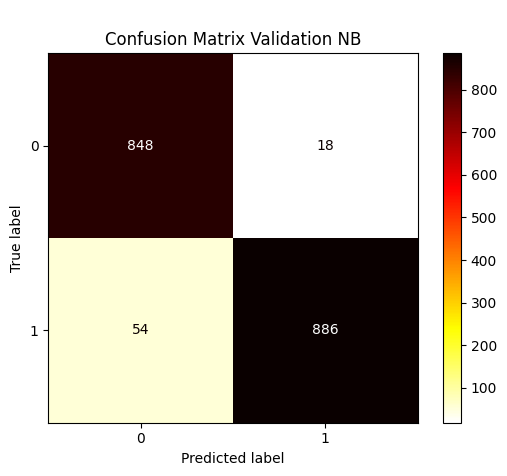

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       927
           1       0.99      0.94      0.96       880

    accuracy                           0.97      1807
   macro avg       0.97      0.97      0.97      1807
weighted avg       0.97      0.97      0.97      1807



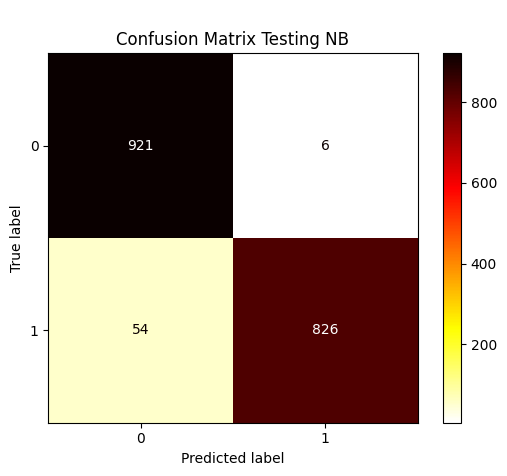

In [81]:
parameters_tuning = {'priors': [None, 0.1, 0.001, 0.05, 1.0],
                    'var_smoothing': [1e-09, 1e-06, 1e-05]}

sms_model = GaussianNB()
sms_model = GridSearchCV(sms_model, parameters_tuning, cv=2)
sms_model.fit(X_train[:700], y_train[:700])
print("Selected Parameters for Naive Bayes:\n", sms_model.best_params_)

## evaluation of training
sms_model = sms_model.best_estimator_
sms_model.fit(X_train, y_train)

## evaluation of validation
y_pred = sms_model.predict(X_val)
print(classification_report(y_val, y_pred))

cmatrix = confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=[0, 1]).plot(cmap='hot_r')
plt.title('\nConfusion Matrix Validation NB')
plt.show()

## evaluation of testing
y_pred = sms_model.predict(X_test)
print(classification_report(y_test, y_pred))

cmatrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=[0, 1]).plot(cmap='hot_r')
plt.title('\nConfusion Matrix Testing NB')
plt.show()

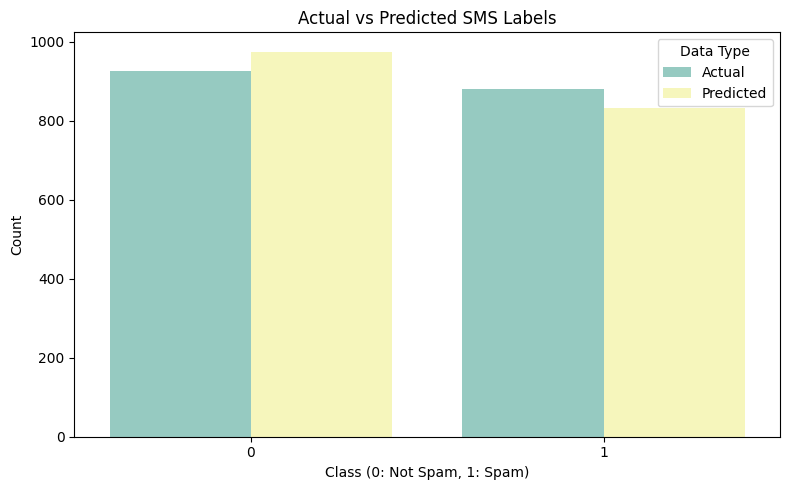

In [82]:
## Converting DataFrame for plotting
spam_results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Melt the DataFrame for seaborn countplot
melted_results = pd.melt(spam_results_df, value_vars=['Actual', 'Predicted'], var_name='Type', value_name='Label')

## Plot the countplot
plt.figure(figsize=(8, 5))
sns.countplot(data=melted_results, x='Label', hue='Type', palette='Set3')
plt.title("Actual vs Predicted SMS Labels")
plt.xlabel('Class (0: Not Spam, 1: Spam)')
plt.ylabel("Count")
plt.legend(title="Data Type")
plt.tight_layout()
plt.show()

### Random Forest

Selected Parameters for Random Forest:
 {'class_weight': 'balanced', 'criterion': 'log_loss', 'max_depth': 10, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       866
           1       0.99      0.98      0.99       940

    accuracy                           0.98      1806
   macro avg       0.98      0.98      0.98      1806
weighted avg       0.98      0.98      0.98      1806



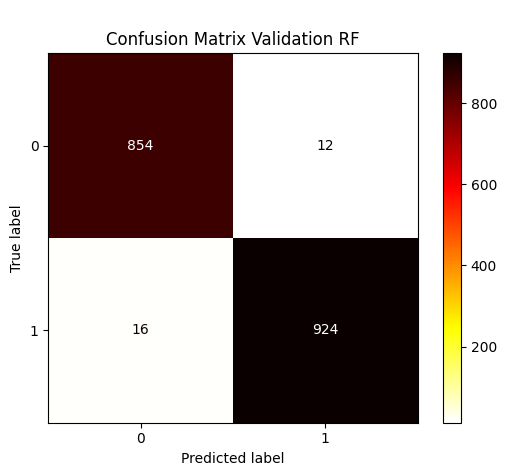

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       927
           1       1.00      0.99      0.99       880

    accuracy                           0.99      1807
   macro avg       0.99      0.99      0.99      1807
weighted avg       0.99      0.99      0.99      1807



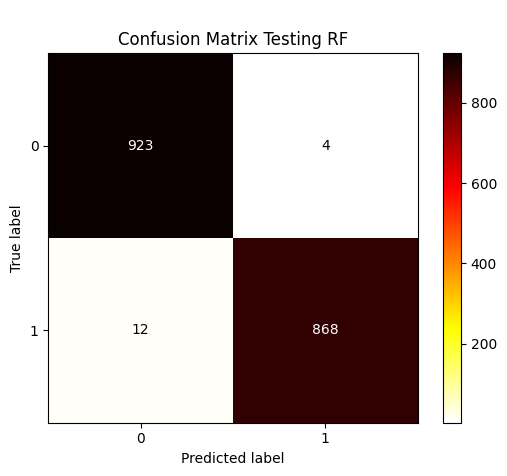

In [83]:
parameters_tuning = {'n_estimators': [50, 10, 100, 200],
                    'criterion': ['gini', 'emtropy', 'log_loss'],
                    'max_depth': [3, 5, 10, 15],
                    'class_weight': ['balanced','balanced_subsample']}

sms_model = RandomForestClassifier()
sms_model = GridSearchCV(sms_model, parameters_tuning, cv=2)
sms_model.fit(X_train[:700], y_train[:700])
print("Selected Parameters for Random Forest:\n", sms_model.best_params_)

## evaluation of training
sms_model = sms_model.best_estimator_
sms_model.fit(X_train, y_train)

## evaluation of validation
y_pred = sms_model.predict(X_val)
print(classification_report(y_val, y_pred))

cmatrix = confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=[0, 1]).plot(cmap='hot_r')
plt.title('\nConfusion Matrix Validation RF')
plt.show()

## evaluation of testing
y_pred = sms_model.predict(X_test)
print(classification_report(y_test, y_pred))

cmatrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=[0, 1]).plot(cmap='hot_r')
plt.title('\nConfusion Matrix Testing RF')
plt.show()

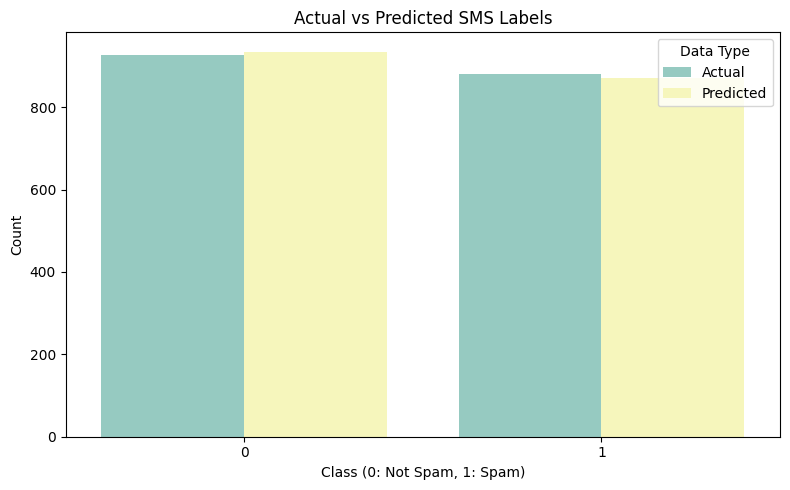

In [84]:
## Converting DataFrame for plotting
spam_results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Melt the DataFrame for seaborn countplot
melted_results = pd.melt(spam_results_df, value_vars=['Actual', 'Predicted'], var_name='Type', value_name='Label')

## Plot the countplot
plt.figure(figsize=(8, 5))
sns.countplot(data=melted_results, x='Label', hue='Type', palette='Set3')
plt.title("Actual vs Predicted SMS Labels")
plt.xlabel('Class (0: Not Spam, 1: Spam)')
plt.ylabel("Count")
plt.legend(title="Data Type")
plt.tight_layout()
plt.show()

### Support Vector Machines

Selected Parameters for Support Vector Machines:
 {'degree': 10, 'gamma': 'scale', 'kernel': 'poly'}
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       866
           1       0.99      0.99      0.99       940

    accuracy                           0.99      1806
   macro avg       0.99      0.99      0.99      1806
weighted avg       0.99      0.99      0.99      1806



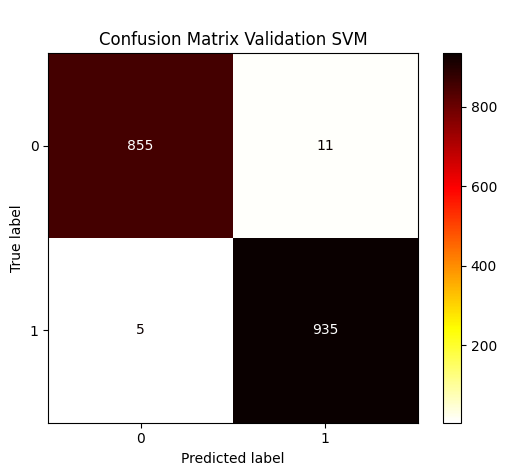

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       927
           1       1.00      0.99      0.99       880

    accuracy                           0.99      1807
   macro avg       0.99      0.99      0.99      1807
weighted avg       0.99      0.99      0.99      1807



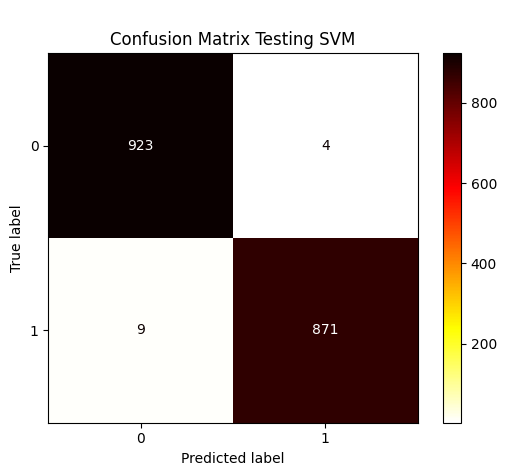

In [85]:
parameters_tuning = {'gamma': ['scale', 'auto'],
                    'degree': [2, 5, 10, 15],
                    'kernel': ['rbf','poly','linear']}

sms_model = SVC()
sms_model = GridSearchCV(sms_model, parameters_tuning, cv=2)
sms_model.fit(X_train[:700], y_train[:700])
print("Selected Parameters for Support Vector Machines:\n", sms_model.best_params_)

## evaluation of training
sms_model = sms_model.best_estimator_
sms_model.fit(X_train, y_train)

## evaluation of validation
y_pred = sms_model.predict(X_val)
print(classification_report(y_val, y_pred))

cmatrix = confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=[0, 1]).plot(cmap='hot_r')
plt.title('\nConfusion Matrix Validation SVM')
plt.show()

## evaluation of testing
y_pred = sms_model.predict(X_test)
print(classification_report(y_test, y_pred))

cmatrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=[0, 1]).plot(cmap='hot_r')
plt.title('\nConfusion Matrix Testing SVM')
plt.show()

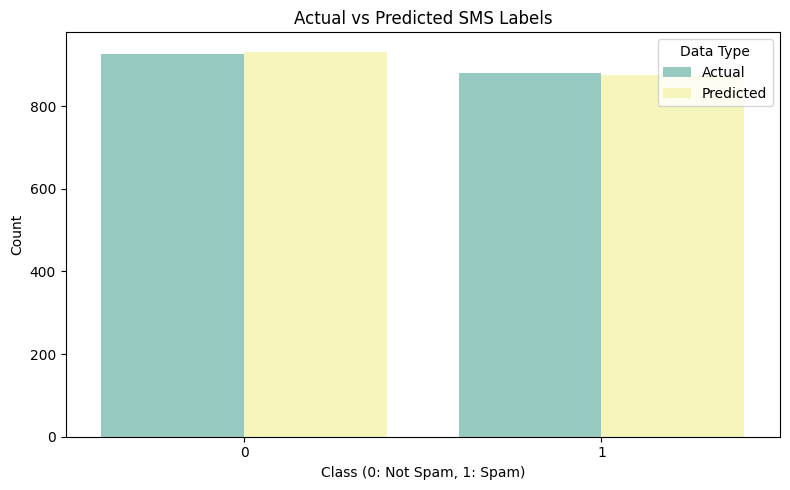

In [86]:
## Converting DataFrame for plotting
spam_results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Melt the DataFrame for seaborn countplot
melted_results = pd.melt(spam_results_df, value_vars=['Actual', 'Predicted'], var_name='Type', value_name='Label')

## Plot the countplot
plt.figure(figsize=(8, 5))
sns.countplot(data=melted_results, x='Label', hue='Type', palette='Set3')
plt.title("Actual vs Predicted SMS Labels")
plt.xlabel('Class (0: Not Spam, 1: Spam)')
plt.ylabel("Count")
plt.legend(title="Data Type")
plt.tight_layout()
plt.show()

### Manual Testing of SMS

In [87]:
import pickle

# Save the model
with open("sms_svm_model.pkl", "wb") as f:
    pickle.dump(sms_model, f)

# Save the vectorizer
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(spam_tfvector, f)

print("Model and Vectorizer saved successfully!")

Model and Vectorizer saved successfully!


In [88]:
import pickle
import numpy as np
import torch
from transformers import BertTokenizer, BertModel

# Load the best of trained model SVM
with open("sms_svm_model.pkl", "rb") as f:
    svm_model = pickle.load(f)

# Load the vectorizer used during training (assuming BERT was used for the best SVM)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

# Mapping: 0 -> ham, 1 -> spam
label_map = {0: "ham", 1: "spam"}

# BERT embeddings for a message
def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = bert_model(**inputs)
    # [CLS] token embedding
    cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze().numpy()
    return cls_embedding.reshape(1, -1) # Reshape for prediction

# Manual testing loop
while True:
    user_input = input("\nEnter a message (or type 'exit'): ").strip()

    if user_input.lower() == "exit":
        print("Exiting...")
        break

    try:
        nltk.data.find('corpora/stopwords')
    except nltk.downloader.DownloadError:
        nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))
    punctuations = string.punctuation

    def clean_text(text):
        text = text.lower()
        text = ''.join([char for char in text if char not in punctuations])
        words = text.split()
        words = [word for word in words if word not in stop_words]
        return ' '.join(words)

    sms_cleaned_input = clean_text(user_input)

    # Transform the input using the BERT model
    sms_message_vec = get_bert_embedding(sms_cleaned_input)

    # Prediction
    sms_pred_label = svm_model.predict(sms_message_vec)[0]
    print(f"Prediction: {label_map[sms_pred_label]}")


Enter a message (or type 'exit'): exit
Exiting...
